In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 


In [21]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [22]:
class spearman_corr:
    def __init__(self,train,test):
        self.train = train
        self.test = test
        self.categorical_cols = self.test.select_dtypes("object").columns
        self.numerical_cols = self.test.select_dtypes(exclude="object").columns
    def make_key(self):
        self.key = pd.DataFrame(columns=["index"], index=pd.MultiIndex.from_tuples([], names=['variable','value']))

        for x in self.categorical_cols:
            kf = self.train.groupby(x)["target"].mean().to_frame().sort_values("target")
            kf = kf.reset_index().reset_index().drop(columns=["target"])
            kf["variable"] = x
            kf.index = kf.index + 1
            self.key = pd.concat([self.key, kf.rename(columns={x:"value"}).set_index(["variable","value"])])

    def encode(self):
        features = pd.concat([train, test])
        reshape_df = pd.melt(features, id_vars="id", value_vars=self.categorical_cols).merge(self.key, on=["variable","value"])
        qualDf= reshape_df.pivot(index='id', columns='variable')["index"]
        features = qualDf.merge(features[self.numerical_cols], on=["id"])
        
        self.features = features
        self.new_train = features[:len(train)]
        self.new_test = features[len(train):]
    def get_key(self):
        return self.key
    def get_train(self):
        return self.new_train
    def get_test(self):
        return self.new_test
    def get_features(self):
        return self.features
    def get_y(self):
        return self.train.target

In [24]:
spearman = spearman_corr(train,test)
spearman.make_key()
spearman.encode()
features = spearman.get_features()
train = spearman.get_train()
test = spearman.get_test()
y = spearman.get_y()
categorical_cols = spearman.categorical_cols

In [26]:
spearman.numerical_cols

Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10'],
      dtype='object')

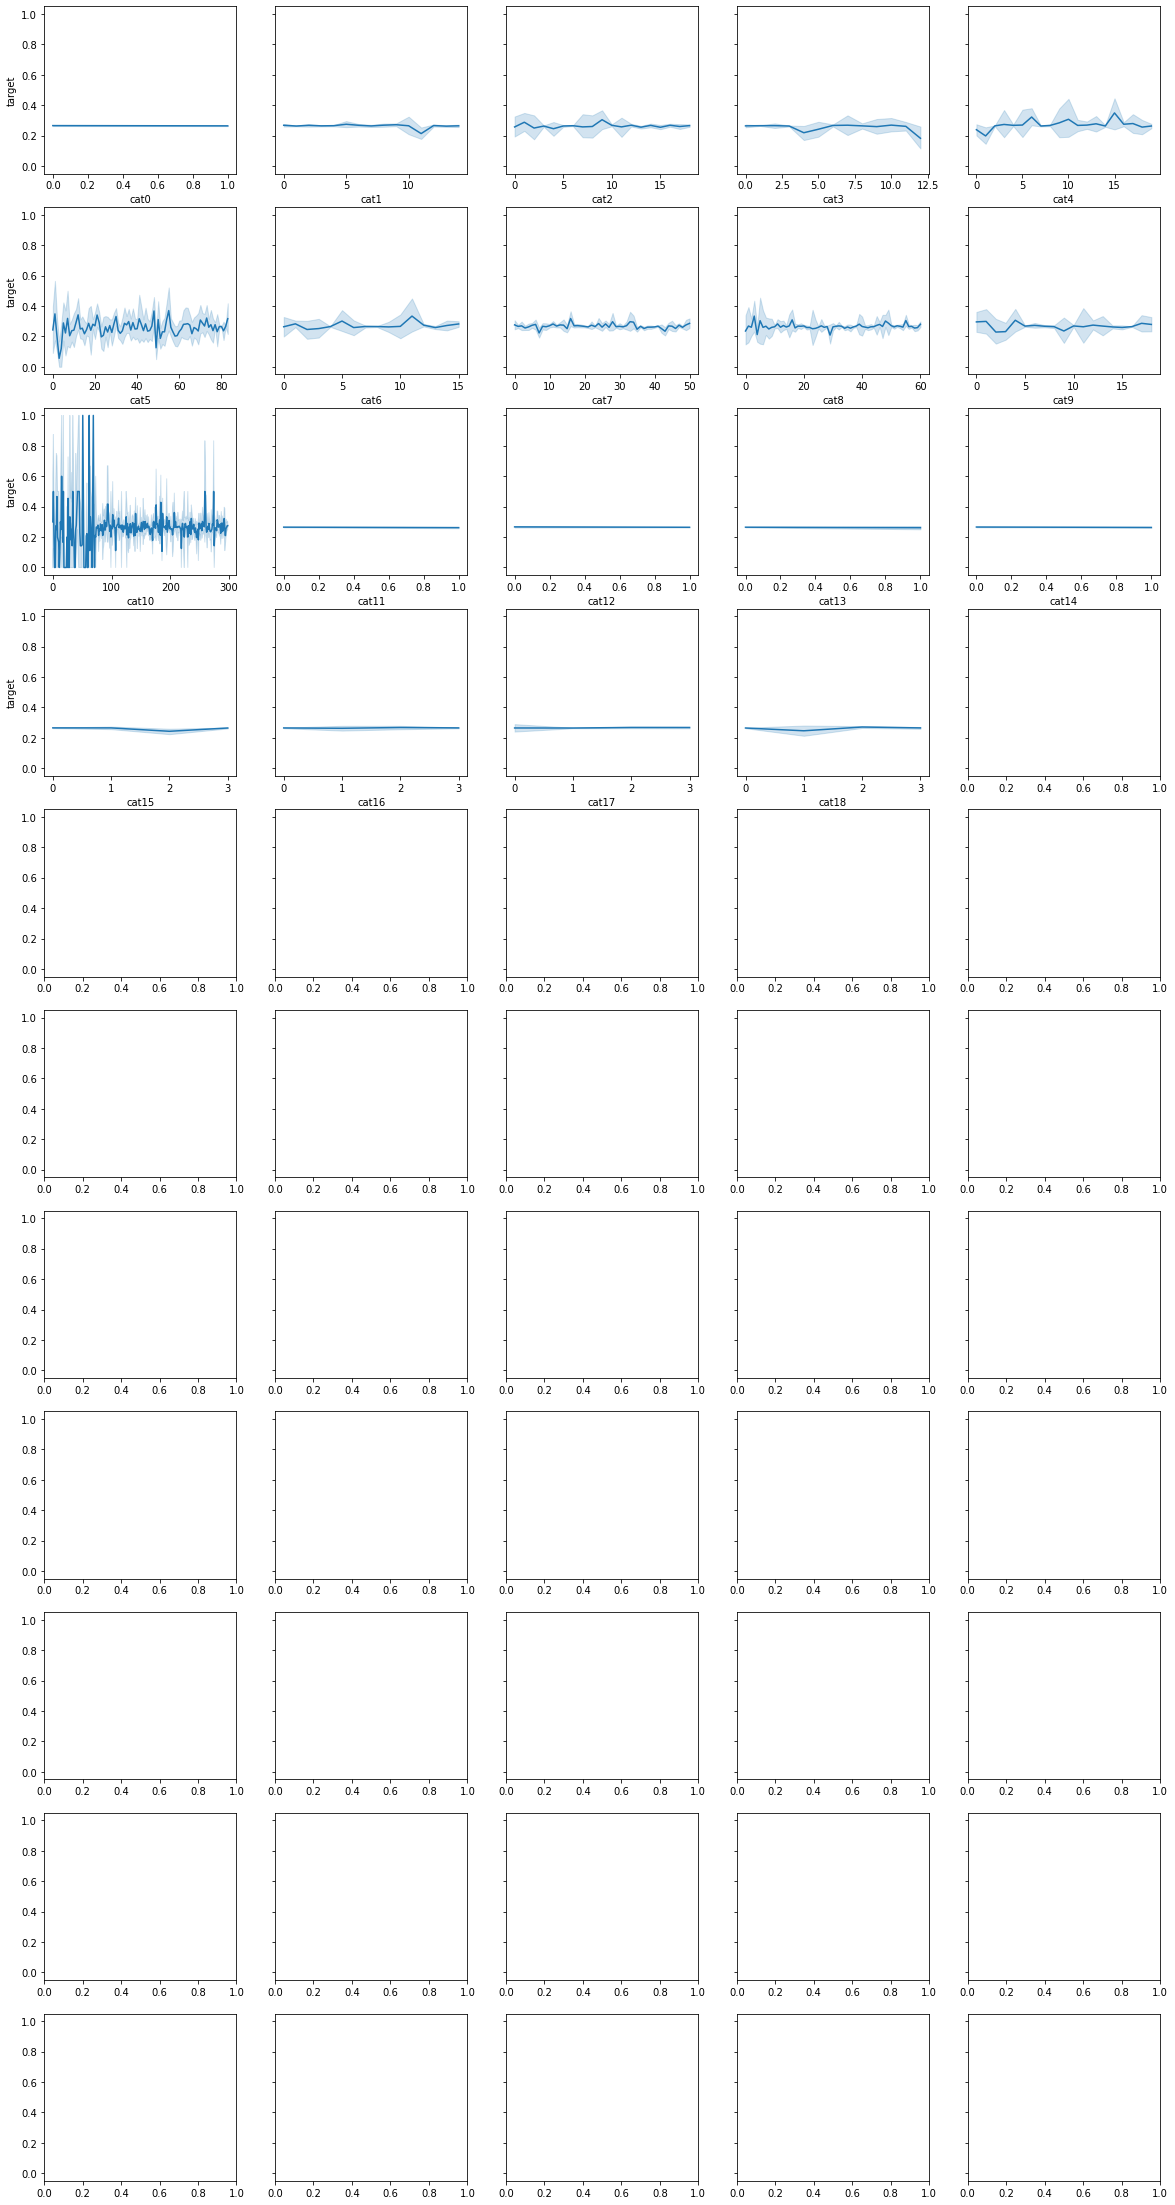

In [7]:
fig, axes = plt.subplots(4, 5, figsize=(20, 40), sharey=True)
#fig.suptitle('Which variables best explain Price?')
axes = np.ravel(axes)
for x in range(len(categorical_cols)):
    ax = sns.lineplot(ax=axes[x], x=train.loc[:,categorical_cols[x]], y=y)

In [13]:
fig, axes = plt.subplots(4, 5, figsize=(20, 40), sharey=True)
#fig.suptitle('Which variables best explain Price?')
axes = np.ravel(axes)
for x in range(len(categorical_cols)):
    ax = sns.lineplot(ax=axes[x], x=train.loc[:,categorical_cols[x]], y=y)

['id',
 'cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'target']

In [18]:
full_train = pd.concat([train,y],axis=1)
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(full_train, id_vars=["target"], value_vars=list(train.columns))

f

,target,variable,value
0,0,id,0
1,0,id,1
2,0,id,2
3,0,id,3
4,1,id,4
...,...,...,...
9299995,0,cont10,0.544713
9299996,0,cont10,0.333504
9299997,1,cont10,0.405484
9299998,0,cont10,0.957497


In [9]:
key = spearman.get_key()

In [9]:
pd.concat([train,y],axis=1)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,N,F,A,E,BU,A,AS,K,...,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0,0
299996,499995,A,K,A,A,G,BI,A,K,AE,...,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0,0
299997,499996,A,G,M,A,H,BI,C,L,F,...,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1,1
299998,499997,B,H,A,D,B,BI,A,AA,AX,...,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0,0


In [8]:
train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,N,F,A,E,BU,A,AS,K,...,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,A,K,A,A,G,BI,A,K,AE,...,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,A,G,M,A,H,BI,C,L,F,...,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,B,H,A,D,B,BI,A,AA,AX,...,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0
